# Gerardo Daniel Vega Rosales

## Parte 1: Numpy

In [1]:
import numpy as np

1) ¿Cuál es el tamaño en bytes de un array de 1000 
elementos de tipo booleano?

In [4]:
array = np.full(1000, True, dtype=bool)
# Get the size of the array in bytes
size_in_bytes = array.nbytes
print("Tamaño en bytes de un array de booleanos:", size_in_bytes, "bytes")

Tamaño en bytes de un array de booleanos: 1000 bytes


2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [8]:
numbers = np.arange(1, 101)
# Filter out the pairs numbers
pair_numbers = numbers[numbers % 2 == 0]
# Sort the pairs numbers array in descending order
pair_numbers_sorted = np.sort(pair_numbers)[::-1]
print("Ultimos 10 valores ordenados en orden decreciente:")
print(pair_numbers_sorted[-10:])

Ultimos 10 valores ordenados en orden decreciente:
[20 18 16 14 12 10  8  6  4  2]


3) Dado el array <br>
        2 4 5 6 <br>
        0 3 7 4 <br>
        8 8 5 2 <br>
        1 5 6 1 <br>
        
Seleccione con una instrucción el subarray de elementos <br>
        0 3 7 4 <br>
        
Después, seleccione el subarray de elementos <br>
        2 5 <br>
        8 5 <br>

In [16]:
elements = [[2, 4, 5, 6],[0, 3, 7, 4],[8, 8, 5, 2],[1, 5, 6, 1]]
print(elements[1])
print()
#list of arrays and retrieves elements at even positions using slicing with a step of 2
pairs_position_elements = [arr[::2] for arr in [elements[0],elements[2]]]
for arr in pairs_position_elements:
    print(arr)

[0, 3, 7, 4]

[2, 5]
[8, 5]


4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [18]:
a = [1, 4, 2, 7]
b = [1, 3, 2, 9]

symmetric_difference = np.setxor1d(a, b) #Return the sorted, unique values that are in only one (not both) of the input arrays.

print("Diferencia simetrica entre a y b:", symmetric_difference)

Diferencia simetrica entre a y b: [3 4 7 9]


5) Tengo valores de cordenadas (x, y) en las columnas del array <br>
    1.33 4.5 <br>
    30.0 10.7 <br>
    70.2 0.5 <br>
Agregue a este array las coordenadas (37.1, -3.6).  <br>
Muestre en pantalla las dimensiones del nuevo array. <br>

In [22]:
x_y_points = [[1.33,4.5],[30.0,10.7],[70.2,0.5]]
#adding the new values
x_y_points.append([37.1,-3.6])
#Convert the list to a numpy to array to get the dimensiones
array_points = np.array(x_y_points)
dimensions = array_points.shape

print("Dimensiones del nuevo array:", dimensions)

Dimensiones del nuevo array: (4, 2)


6) Copie el array del ejercicio anterior. Traspóngalo (Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [26]:
x_y_points = [[1.33,4.5],[30.0,10.7],[70.2,0.5]]

# Convert the list of lists to a NumPy array
array_points = np.array(x_y_points)

# Transpose the array
transposed_array = np.transpose(array_points)

# Convert the transposed array back to a list of lists
transposed_list = transposed_array.tolist()

#adding the new values
transposed_list.append([10.8, 3.0])
transposed_list.append([35.8, 12])

print("Array Final:")
print(transposed_list)

Array Final:
[[1.33, 30.0, 70.2], [4.5, 10.7, 0.5], [10.8, 3.0], [35.8, 12]]


## Parte 2: Exploración y Minería de Datos

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
dataset = pd.read_csv("NucleosPoblacion.csv")
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


1) ¿Cuántos Municipios tienen más de 100000 habitantes?

In [7]:
# Filter the DataFrame to rows where Poblacion is greater than 100,000
filtered_data = dataset[dataset['Poblacion'] > 100000]
# Select the Municipio column from the filtered DataFrame
municipio = filtered_data['Municipio']
print(f"La cantidad de municipios que tienen mas de 100000 habitantes son: {len(municipio)}")

La cantidad de municipios que tienen mas de 100000 habitantes son: 62


2) Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayo y responda: <br>
a. ¿Cuál es la segunda ciudad más poblada? <br>
b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas? <br>

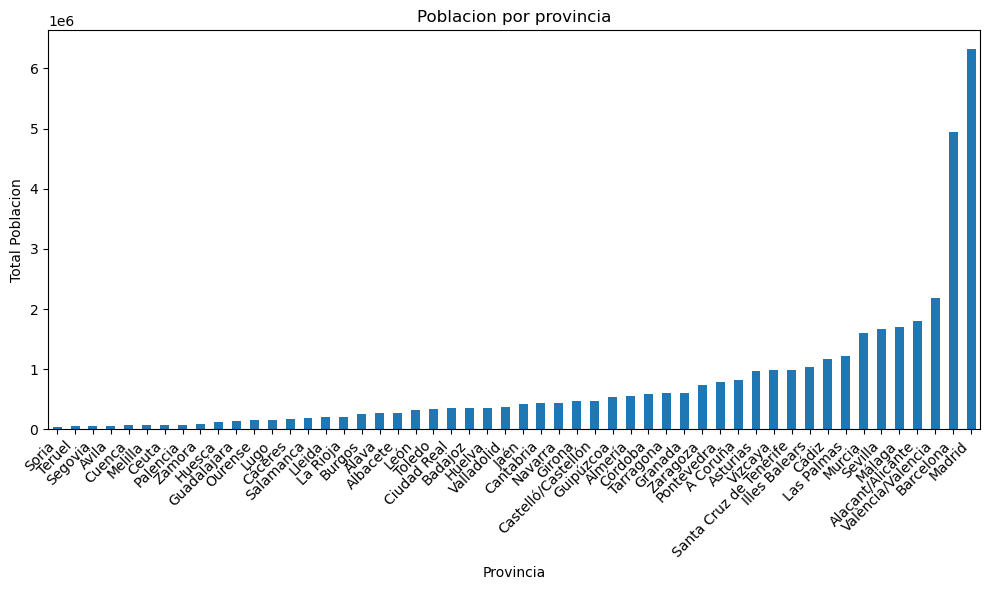

La segunda ciudad mas poblada es: Barcelona con un total de poblacion de: 4934795.0
Granada esta en la posicion: 17


In [28]:
# Group the data by "Province" and calculate the sum of "Poblacion" for each province and order by
grouped_data = dataset.groupby('Provincia')['Poblacion'].sum().sort_values()

# Create a bar graph
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar')
plt.title('Poblacion por provincia')
plt.xlabel('Provincia')
plt.ylabel('Total Poblacion')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

# Find the second province more populated
second_province_population = grouped_data.nlargest(2).iloc[-1]
second_province = grouped_data.nlargest(2).index[-1]
print("La segunda ciudad mas poblada es:", second_province, "con un total de poblacion de:", second_province_population)

# Determine the position of the province "Granada"
#We need to subtract the longitude because we start counting from the most populated province.
granada_position = len(grouped_data) - grouped_data.index.get_loc("Granada")
print("Granada esta en la posicion:", granada_position)



3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [37]:
# Filter the DataFrame to rows where Poblacion is greater than 100,000
filtered_data = dataset[(dataset['Provincia'] == 'Badajoz') | (dataset['Provincia'] == 'Cáceres')  & (dataset['Poblacion'] > 5000)]
# Select the Municipio column from the filtered DataFrame
municipio = filtered_data['Municipio']
print(f"La cantidad de municipios de Extremadura con mas de 5000 habitantes son: {len(municipio)}")

La cantidad de municipios de Extremadura con mas de 5000 habitantes son: 14


4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). <br>Proporcione también la provincia a la que pertenece y su población

In [41]:
# Find the index of the row where the latitude (X) is the greatest
max_latitude_index = dataset['Y'].idxmax()

#Select the data based on the index for greatest latitude
municipio = dataset.loc[max_latitude_index, 'Municipio']
provincia = dataset.loc[max_latitude_index, 'Provincia']
poblacion = dataset.loc[max_latitude_index, 'Poblacion']

print("El municipio situado mas al norte es:", municipio)
print("Pertenece a la provincia:", provincia)
print("Tiene un total de poblacion de:", poblacion)

El municipio situado mas al norte es: Viveiro
Pertenece a la provincia: Lugo
Tiene un total de poblacion de: 16211.0


5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [47]:
# Filter rows where Province is "Granada"
province_date = dataset[dataset['Provincia'] == 'Granada']

print("Media:", province_date['Poblacion'].mean())
print("Mediana:", province_date['Poblacion'].median())
print("Desviacion Estandar:", province_date['Poblacion'].std())
print("Valor Maximo:",province_date['Poblacion'].max())
print("Valor Minimo:",  province_date['Poblacion'].min())


Media: 30217.85
Mediana: 17526.0
Desviacion Estandar: 50355.49171459277
Valor Maximo: 239154.0
Valor Minimo: 10386.0


6) Realice un histograma con la población de los Municipios para cada una de las provincias.

In [ ]:
# Get the unique province names
uniqueProvincia = sorted(dataset['Provincia'].unique())

for provincia in uniqueProvincia:
     # Filter data for the current province
    province_data = dataset[dataset['Provincia'] == provincia]    
    # Create histogram for the population of municipalities in the current province
    plt.hist(province_data['Poblacion'], bins=20, alpha=0.5)
    # Add labels and title
    plt.title(f"Distribucion por poblacion: {provincia}")
    plt.xlabel('Poblacion')
    plt.ylabel('Frecuencia')
    plt.show()

7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. <br> ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [80]:
import random

def getRandomValue(indexUse, municipios):
    element = None
    while(True):
        munIndex =random.randint(0,len(municipios)) -1
        muni = list(municipios)[munIndex]
        if(muni in indexUse):
            continue
        else:
            indexUse.add(muni)
            element = muni
            break
    return element

uniqueMunicipies = sorted(dataset['Municipio'].unique())
municipios = set({})
indexUse = set({})
for i in range(50):
    municipios.add(getRandomValue(indexUse, uniqueMunicipies))
    
filtered_data = dataset[dataset['Municipio'].isin(municipios)]
print("Media:", filtered_data['Poblacion'].mean())
print("Desviacion Estandar:", filtered_data['Poblacion'].std())

Media: 45793.15094339623
Desviacion Estandar: 111204.51982208903


8) Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. <br> No considere a Madrid en el análisis ya que la distancia sería cero

In [162]:
from geopy.distance import geodesic
madrid_data = dataset[(dataset['Provincia'] == 'Madrid') & (dataset['Municipio'] == 'Madrid')]
#Get the base information for the initial point of Madrid
madrid_coordinates = (madrid_data["Y"].tolist()[0],madrid_data["X"].tolist()[0])

# Function to calculate distance between two points
def calculate_distance(row):
    municipality_coordinates = (row['Y'], row['X'])  # Coordinates of the municipality
    return geodesic(madrid_coordinates, municipality_coordinates).kilometers

#Remove the Municipio of Madrid for the set
madrid_data = dataset[(dataset['Provincia'] == 'Madrid') & (dataset['Municipio'] != 'Madrid')]
madrid_data['Distancia_Madrid'] = madrid_data.apply(calculate_distance, axis=1)

# Find the closest and farthest municipalities from Madrid
minucipalidad_cercana_idx =madrid_data['Distancia_Madrid'].idxmin()
municipalidad_lejana_idx = madrid_data['Distancia_Madrid'].idxmax()

municipio = madrid_data.loc[minucipalidad_cercana_idx, 'Municipio']
distancia = madrid_data.loc[minucipalidad_cercana_idx, 'Distancia_Madrid']
print("Municipalidad mas cercana a Madrid:",municipio, "distancia:", round(float(distancia),2),"Km")

municipio = madrid_data.loc[municipalidad_lejana_idx, 'Municipio']
distancia = madrid_data.loc[municipalidad_lejana_idx, 'Distancia_Madrid']
print("Municipalidad mas lejana a Madrid:",municipio, "distancia:", round(float(distancia),2),"Km")

Municipalidad mas cercana a Madrid: Pozuelo de Alarcón distancia: 6.93 Km
Municipalidad mas lejana a Madrid: Aranjuez distancia: 43.41 Km


C:\Users\gerda\AppData\Local\Temp\ipykernel_7300\2658813926.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_data['Distancia_Madrid'] = madrid_data.apply(calculate_distance, axis=1)


In [ ]:
%%bash
echo "Start Script"
if [ -d ".git" ]
then
echo "We can perform the git command"
git add .
git commit -m "part 2"
echo "Pushing data to remote server!!!"
git push master
else
echo "Please add the origin after perform git commands"
fi
echo "Finish Script"

Start Script
We can perform the git command
[main 1b14993] part 1
 2 files changed, 92 insertions(+), 8 deletions(-)
Pushing data to remote server!!!
